In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore') #to ignore warnings 

In [2]:
file_path = "/home/singhvi28/Desktop/data-analysis-project/heart.csv"
data = pd.read_csv(file_path)

In [3]:
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


## Part 1 - Exploratory Data Analysis

In [5]:
# check for null values
data.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

there are no null values

In [7]:
data.groupby(['HeartDisease'])['HeartDisease'].count()

HeartDisease
0    410
1    508
Name: HeartDisease, dtype: int64

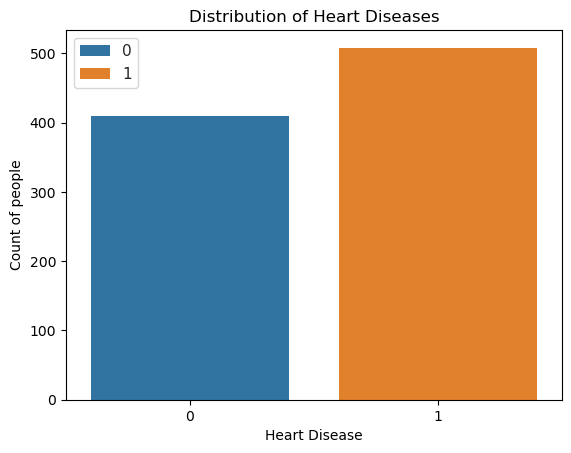

In [8]:
ax = sns.countplot(x = data['HeartDisease'],hue = data['HeartDisease'])
ax.set_title('Distribution of Heart Diseases')
sns.set_theme(style="whitegrid")
ax.set_xlabel('Heart Disease')
ax.set_ylabel('Count of people')
plt.legend()
plt.show()

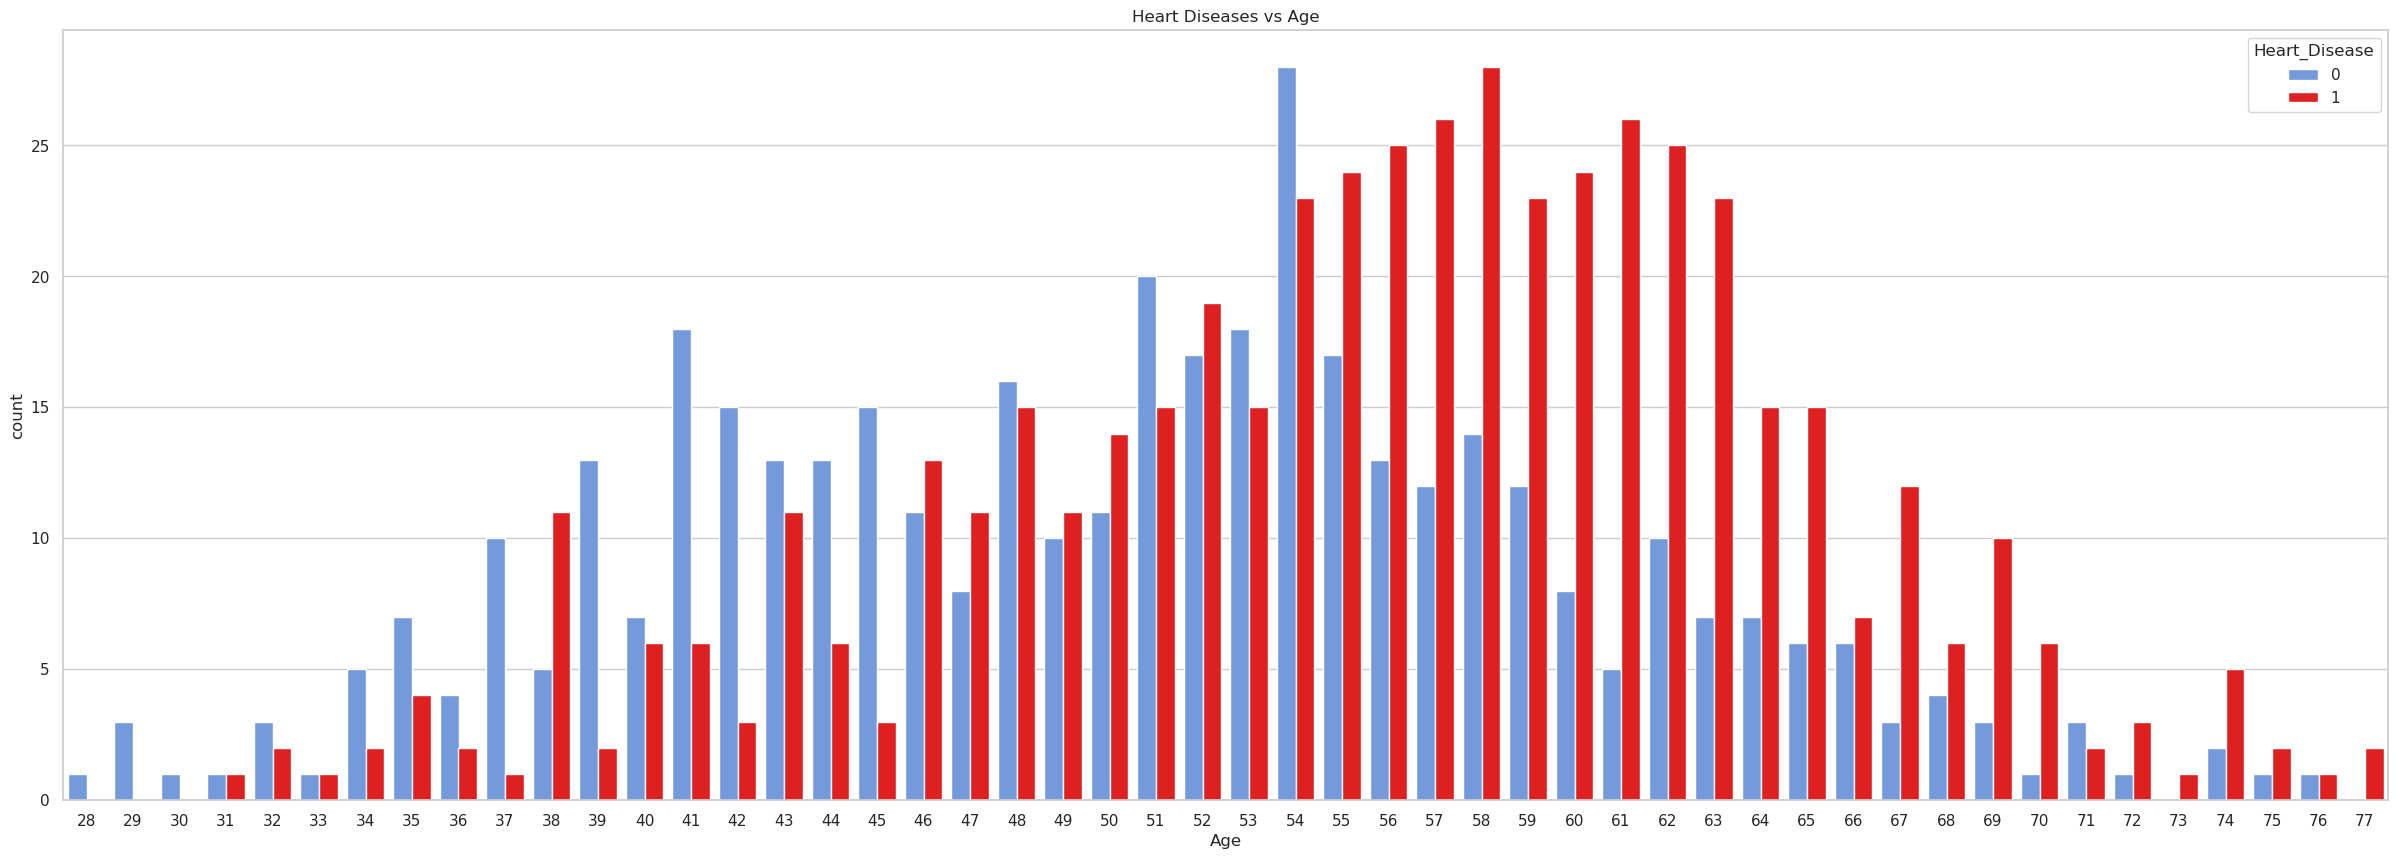

In [9]:
df = pd.DataFrame({"Heart_Disease": data['HeartDisease'], "Age": data['Age']})
plt.figure(figsize=(30, 10))
sns.set_theme(style="whitegrid")
ax = sns.countplot(x=df["Age"], hue=df["Heart_Disease"], palette=['#6495ED', 'red'])
ax.set_title('Heart Diseases vs Age')
plt.show()

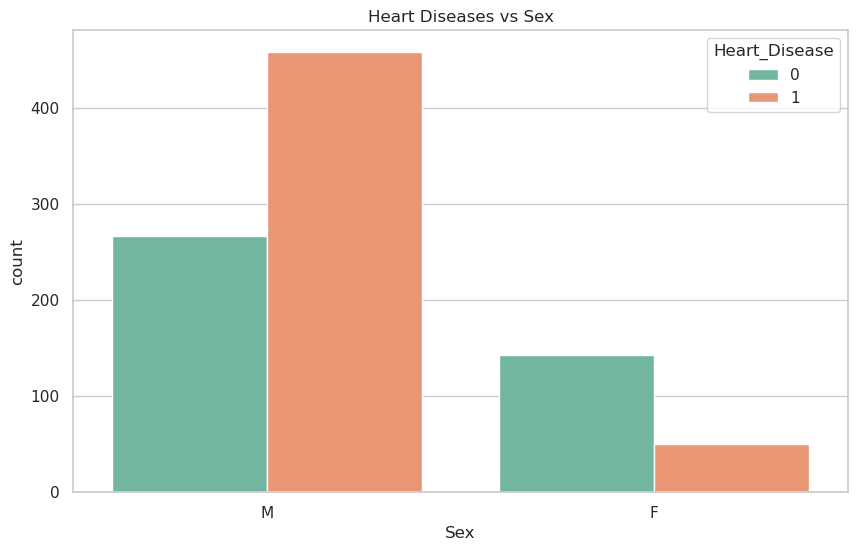

In [10]:
#Occurance of heart diseases with gender
df = pd.DataFrame({"Heart_Disease":data['HeartDisease'],"Sex":data['Sex']})
plt.figure(figsize=(10, 6))
ax = sns.countplot(x=df["Sex"], hue=df["Heart_Disease"],palette = 'Set2')
ax.set_title('Heart Diseases vs Sex')
sns.set_theme(style="whitegrid")

Text(0.5, 1.0, 'Heart Diseases vs BP')

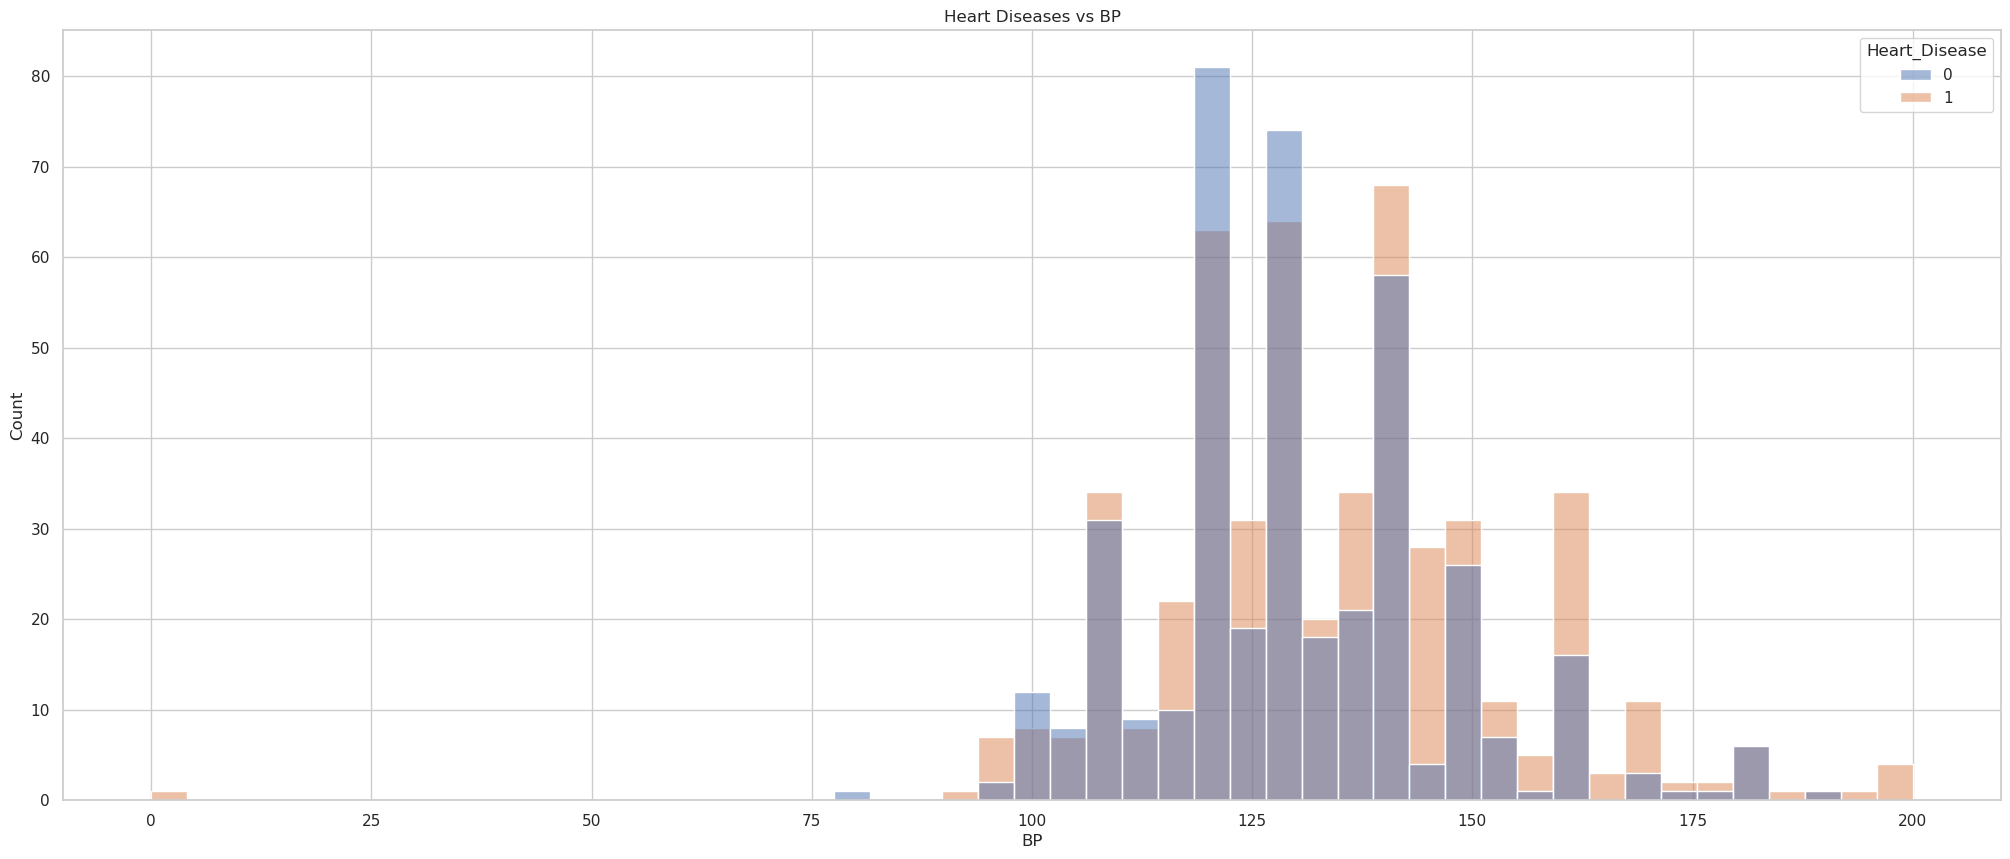

In [11]:
#Occurance of heart diseases with hypertension
df = pd.DataFrame({"Heart_Disease":data['HeartDisease'],"BP":data['RestingBP']})
plt.figure(figsize=(25, 10))
ax = sns.histplot(x=df["BP"], hue=df["Heart_Disease"])
ax.set_title('Heart Diseases vs BP')

Text(0.5, 1.0, 'Heart Diseases vs Diabetes')

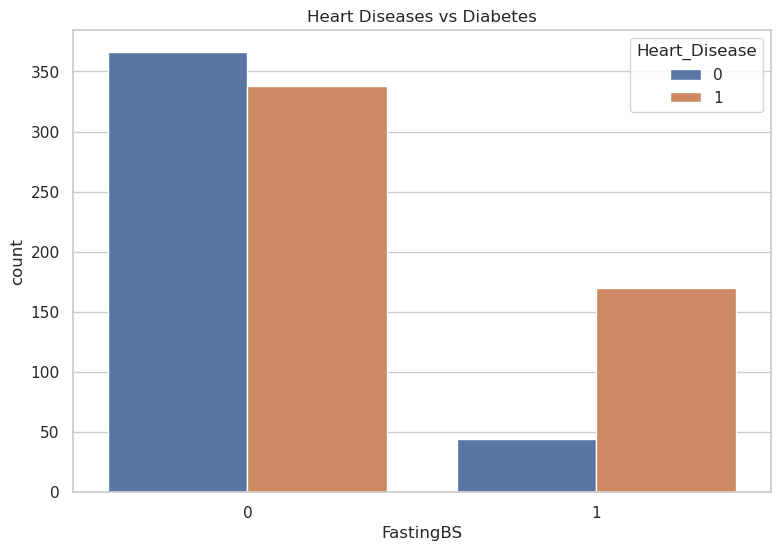

In [12]:
#Occurance of heart diseases with diabetes
df = pd.DataFrame({"Heart_Disease":data['HeartDisease'],"FastingBS":data['FastingBS']})
plt.figure(figsize=(9,6))
ax = sns.countplot(x=df["FastingBS"], hue=df["Heart_Disease"])
ax.set_title('Heart Diseases vs Diabetes')

### Removing Outliers for Numerical Features

#### for `Age` column

<Axes: ylabel='Age'>

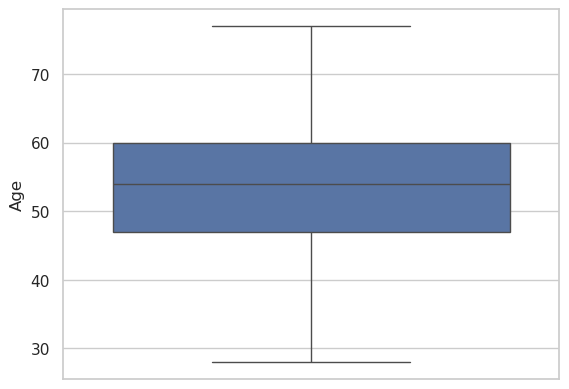

In [15]:
#identifying the outliers
sns.boxplot(data['Age'])

In [16]:
# Calculate the upper and lower limits
Q1 = data['Age'].quantile(0.25)
Q3 = data['Age'].quantile(0.75)
IQR = Q3 - Q1
#IQR - inter quartile range
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR

In [17]:
# Create arrays of Boolean values indicating the outlier rows
upper_array = np.where(data['Age']>=upper)[0]
lower_array = np.where(data['Age']<=lower)[0]

In [18]:
# Removing the outliers
data.drop(index=upper_array, inplace=True)
data.drop(index=lower_array, inplace=True)

#### for `Cholestrol` column

<Axes: ylabel='Cholesterol'>

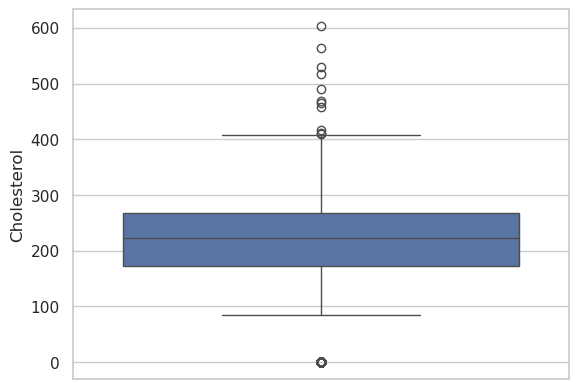

In [20]:
sns.boxplot(data['Cholesterol'])

In [21]:
# Calculate the upper and lower limits
Q1 = data['Cholesterol'].quantile(0.25)
Q3 = data['Cholesterol'].quantile(0.75)
IQR = Q3 - Q1
#IQR - inter quartile range
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR

In [22]:
# Create arrays of Boolean values indicating the outlier rows
upper_array = np.where(data['Cholesterol']>=upper)[0]
lower_array = np.where(data['Cholesterol']<=lower)[0]

In [23]:
# Removing the outliers
common_indices = np.intersect1d(upper_array, lower_array)
data.drop(index=common_indices, inplace=True)

#### for `MaxHR` column

<Axes: ylabel='MaxHR'>

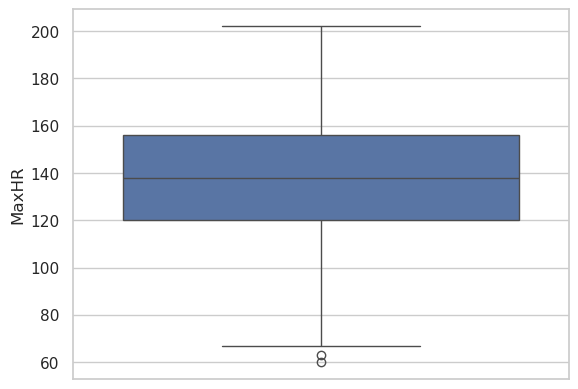

In [25]:
sns.boxplot(data['MaxHR'])

In [26]:
# Calculate the upper and lower limits
Q1 = data['MaxHR'].quantile(0.25)
Q3 = data['MaxHR'].quantile(0.75)
IQR = Q3 - Q1
#IQR - inter quartile range
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR

In [27]:
# Create arrays of Boolean values indicating the outlier rows
upper_array = np.where(data['MaxHR']>=upper)[0]
lower_array = np.where(data['MaxHR']<=lower)[0]

In [28]:
# Removing the outliers
common_indices = np.intersect1d(upper_array, lower_array)
data.drop(index=common_indices, inplace=True)

#### for `RestingBP`

<Axes: ylabel='RestingBP'>

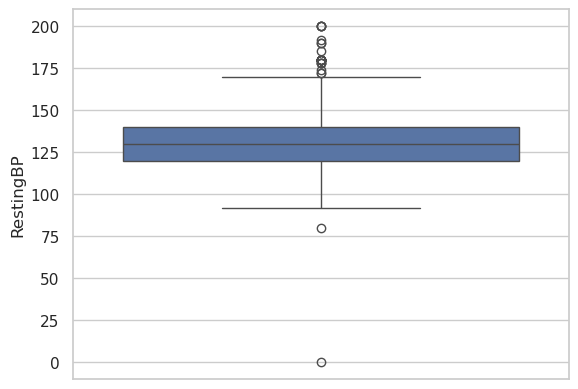

In [30]:
sns.boxplot(data['RestingBP'])

In [31]:
# Calculate the upper and lower limits
Q1 = data['RestingBP'].quantile(0.25)
Q3 = data['RestingBP'].quantile(0.75)
IQR = Q3 - Q1
#IQR - inter quartile range
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR

In [32]:
# Create arrays of Boolean values indicating the outlier rows
upper_array = np.where(data['RestingBP']>=upper)[0]
lower_array = np.where(data['RestingBP']<=lower)[0]

In [33]:
# Removing the outliers
common_indices = np.intersect1d(upper_array, lower_array)
data.drop(index=common_indices, inplace=True)

#### for `Oldpeak` column

<Axes: ylabel='Oldpeak'>

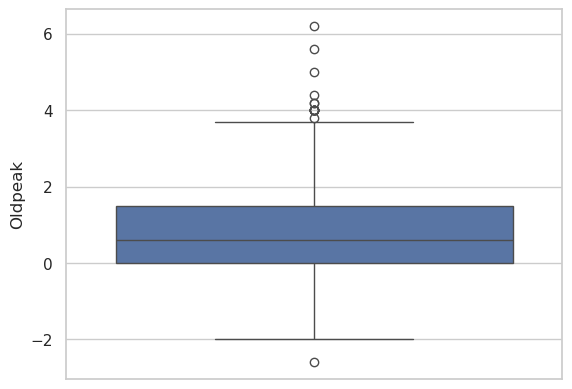

In [35]:
sns.boxplot(data['Oldpeak'])

In [36]:
# Calculate the upper and lower limits
Q1 = data['Oldpeak'].quantile(0.25)
Q3 = data['Oldpeak'].quantile(0.75)
IQR = Q3 - Q1
#IQR - inter quartile range
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR

In [37]:
# Create arrays of Boolean values indicating the outlier rows
upper_array = np.where(data['Oldpeak']>=upper)[0]
lower_array = np.where(data['Oldpeak']<=lower)[0]

In [38]:
# Removing the outliers
common_indices = np.intersect1d(upper_array, lower_array)
data.drop(index=common_indices, inplace=True)

### Statistical Tests

#### ANOVA (ANanlysis Of VAriance) Testing
Perform ANOVA to compare mean values of numeric variables (e.g., RestingBP, Cholesterol) across different categories of `ChestPainType`.
This will help determine if different types of chest pain are associated with variations in these clinical measurements.

In [41]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [42]:
# List of numeric features to test
numeric_features = ['RestingBP', 'Cholesterol', 'MaxHR']

# Dictionary to store ANOVA results
anova_results = {}

# Perform ANOVA for each numeric feature based on ChestPainType
for feature in numeric_features:
    model = ols(f'{feature} ~ C(ChestPainType)', data=data).fit()
    anova_table = sm.stats.anova_lm(model, typ=2)
    anova_results[feature] = anova_table

# Display the ANOVA results
for feature, result in anova_results.items():
    print(f"ANOVA results for {feature}:\n{result}\n")

ANOVA results for RestingBP:
                         sum_sq     df         F    PR(>F)
C(ChestPainType)    2048.455521    3.0  1.998545  0.112621
Residual          312275.213325  914.0       NaN       NaN

ANOVA results for Cholesterol:
                        sum_sq     df         F   PR(>F)
C(ChestPainType)  2.796932e+05    3.0  7.969724  0.00003
Residual          1.069211e+07  914.0       NaN      NaN

ANOVA results for MaxHR:
                         sum_sq     df         F        PR(>F)
C(ChestPainType)   79522.267947    3.0  47.05307  2.786706e-28
Residual          514903.371487  914.0       NaN           NaN



1. `RestingBP`: The p-value is appox. 0.113 (>0.05). There is no significant difference in `RestingBP` across different `ChestPainType` categories. In other words, the type of chest pain doesn't significantly affect resting blood pressure.

2. `Cholestrol`: The p-value is appox. 0.00003 (<<0.05). There is a statistically significant difference in cholesterol levels across the `ChestPainType` categories. This suggests that the type of chest pain is associated with variations in cholesterol levels.

3. `MaxHR`: The p-value is extremely small. There is a highly significant difference in maximum heart rate (`MaxHR`) across the `ChestPainType` categories. This indicates that the type of chest pain has a strong influence on maximum heart rate.

#### Chi-Square Test

In [45]:
from scipy.stats import chi2_contingency

In [46]:
# Identify categorical features in the dataset
categorical_features = data.select_dtypes(include=['object']).columns

# Store results
chi_square_results = {}

# Perform Chi-Square test for each categorical feature with the target
for feature in categorical_features:
    contingency_table = pd.crosstab(data[feature], data['HeartDisease'])
    chi2, p, dof, expected = chi2_contingency(contingency_table)

    chi_square_results[feature] = {
        'Chi2 Statistic': chi2,
        'P-Value': p,
        'Degrees of Freedom': dof
    }

In [47]:
# Display the results
for feature, results in chi_square_results.items():
    print(f"Feature: {feature}")
    print(f"Chi2 Statistic: {results['Chi2 Statistic']:.4f}")
    print(f"P-Value: {results['P-Value']:.4f}")
    print(f"Degrees of Freedom: {results['Degrees of Freedom']}")
    print('-' * 40)

Feature: Sex
Chi2 Statistic: 84.1451
P-Value: 0.0000
Degrees of Freedom: 1
----------------------------------------
Feature: ChestPainType
Chi2 Statistic: 268.0672
P-Value: 0.0000
Degrees of Freedom: 3
----------------------------------------
Feature: RestingECG
Chi2 Statistic: 10.9315
P-Value: 0.0042
Degrees of Freedom: 2
----------------------------------------
Feature: ExerciseAngina
Chi2 Statistic: 222.2594
P-Value: 0.0000
Degrees of Freedom: 1
----------------------------------------
Feature: ST_Slope
Chi2 Statistic: 355.9184
P-Value: 0.0000
Degrees of Freedom: 2
----------------------------------------


In [48]:
# Interpret results based on p-value
alpha = 0.05
for feature, results in chi_square_results.items():
    if results['P-Value'] < alpha:
        print(f"{feature} is significantly related to HeartDisease (p < {alpha}).")
    else:
        print(f"{feature} is not significantly related to HeartDisease (p >= {alpha}).")

Sex is significantly related to HeartDisease (p < 0.05).
ChestPainType is significantly related to HeartDisease (p < 0.05).
RestingECG is significantly related to HeartDisease (p < 0.05).
ExerciseAngina is significantly related to HeartDisease (p < 0.05).
ST_Slope is significantly related to HeartDisease (p < 0.05).


#### Correlational Matrix

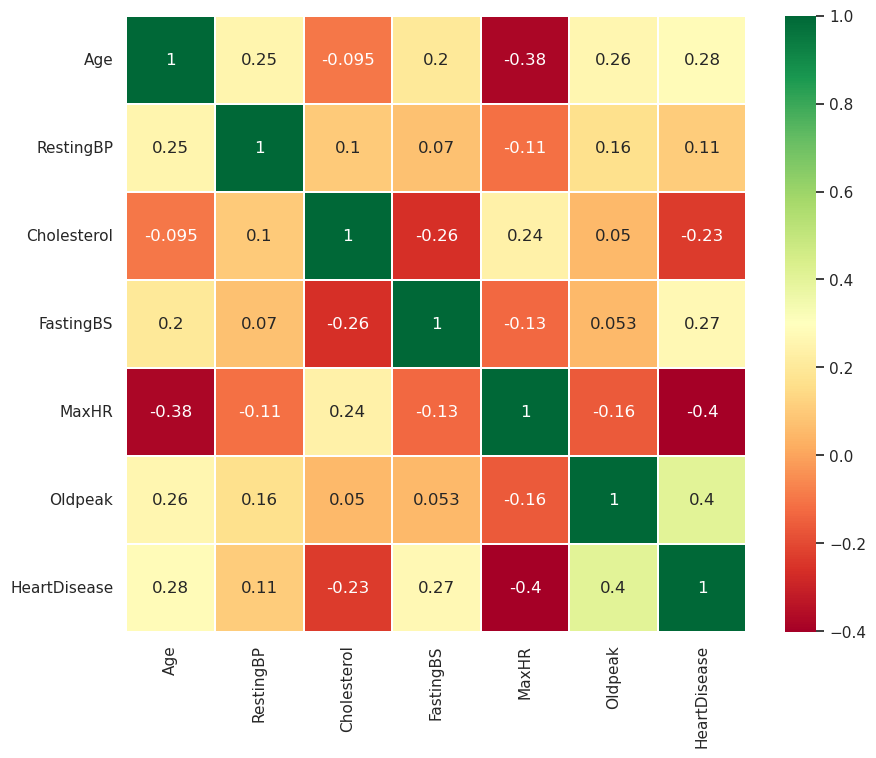

In [50]:
# Selecting only numeric columns for the correlation matrix
numeric_data = data.select_dtypes(include=['number'])
sns.heatmap(numeric_data.corr(), annot=True, cmap='RdYlGn', linewidths=0.2)
fig = plt.gcf()
fig.set_size_inches(10, 8)
plt.show()

##### Key Observations:
##### 1. `Oldpeak` and `HeartDisease`:
The correlation between Oldpeak (ST depression induced by exercise) and HeartDisease (`0.4`) is positive and relatively strong compared to other features. <br>
Inference: Higher Oldpeak values are associated with a greater likelihood of heart disease. This indicates that the severity of ST depression is an important risk factor for heart disease.

##### 2. `MaxHR` and `HeartDisease`:
There is a negative correlation (`-0.4`) between MaxHR (maximum heart rate) and HeartDisease. <br>
Inference: Lower maximum heart rates are associated with a higher likelihood of heart disease. This suggests that patients with heart disease may have lower maximum heart rates during exercise.

##### 3. `RestingBP` and `Cholesterol`:
The correlation between RestingBP (resting blood pressure) and Cholesterol is weak (`0.1`), indicating that these variables do not significantly influence each other. <br>
Inference: These two variables are likely independent factors in this dataset, and their values do not necessarily vary together.

## Part 2 - Logistic Regression

Logistic Regression is a fundamental algorithm for binary classification tasks, making it an ideal starting point for heart disease prediction. Additionally, logistic regression is computationally efficient and works well when the relationship between features and the target is approximately linear.

##### Importing the libraries for training and pre-processing

In [54]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [55]:
class LogisticRegression:
    def __init__(self, learning_rate=0.01, max_iter=1000):
        self.learning_rate = learning_rate
        self.max_iter = max_iter

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def fit(self, X, y):
        self.m, self.n = X.shape
        self.weights = np.zeros(self.n)
        self.bias = 0

        for _ in range(self.max_iter):
            linear_model = np.dot(X, self.weights) + self.bias
            predictions = self.sigmoid(linear_model)

            # Compute gradients
            dw = (1 / self.m) * np.dot(X.T, (predictions - y))
            db = (1 / self.m) * np.sum(predictions - y)

            # Update parameters
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    def predict(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        predictions = self.sigmoid(linear_model)
        return (predictions >= 0.5).astype(int)

##### Preparing the training and testing data

In [57]:
# Splitting the dataset into training and testing sets
train, test = train_test_split(data, test_size=0.2, random_state=42)

# Separating features and target variable for training data
X_train = train.drop(['HeartDisease'], axis=1)
Y_train = train['HeartDisease']

# Separating features and target variable for testing data
X_test = test.drop(['HeartDisease'], axis=1)
Y_test = test['HeartDisease']

In [58]:
# Identify numeric and categorical features
numeric_features = X_train.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X_train.select_dtypes(include=['object']).columns

# Preprocessing pipeline for numeric and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),  # Standardize numeric features
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)  # One-hot encode categorical features
    ])

##### Training and testing with Logistic Regression

In [60]:
# Apply preprocessing
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

# Convert target variable to numpy array
Y_train = Y_train.to_numpy()
Y_test = Y_test.to_numpy()

In [61]:
# Train Logistic Regression Model
lr_model = LogisticRegression(learning_rate=0.01, max_iter=1000)
lr_model.fit(X_train_processed, Y_train)

# Predictions on training and testing data
train_predictions = lr_model.predict(X_train_processed)
test_predictions = lr_model.predict(X_test_processed)

In [62]:
from sklearn.metrics import accuracy_score, classification_report

In [63]:
# Evaluate the model
train_accuracy = accuracy_score(Y_train, train_predictions)
test_accuracy = accuracy_score(Y_test, test_predictions)

In [64]:
print(f"Training Accuracy: {100*train_accuracy:.2f}%")
print(f"Testing Accuracy: {100*test_accuracy:.2f}%")
print("\nClassification Report:\n", classification_report(Y_test, test_predictions))

Training Accuracy: 85.69%
Testing Accuracy: 85.87%

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.87      0.84        77
           1       0.90      0.85      0.88       107

    accuracy                           0.86       184
   macro avg       0.85      0.86      0.86       184
weighted avg       0.86      0.86      0.86       184



## Part 3 - Support Vector Machine

SVM is effective for binary classification, especially when classes are separable. It works well on small-to-medium-sized datasets and can handle non-linear relationships using kernel functions, making it a suitable choice for this data.

In [66]:
from sklearn.svm import SVC

In [67]:
svm_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', SVC(kernel='rbf', C=1, gamma='scale'))  # SVM with RBF kernel
])

#### SVM Configuration

<b> Kernel: rbf (Radial Basis Function) </b> <br>
The RBF kernel is chosen because it’s effective for non-linear data. It transforms the feature space, allowing the <br>
SVM to find a non-linear decision boundary when classes are not linearly separable in the original feature space.

<b> C Parameter: 1 </b> <br>
The C parameter controls the trade-off between maximizing the margin and minimizing classification errors. A smaller value <br>
would create a larger margin but may allow misclassification, while a larger value (like 1) tries to correctly classify as <br>
many points as possible but may reduce the margin width.

<b> Gamma: 'scale' </b> <br>
Gamma defines how far the influence of a single data point reaches. 'scale' is a default setting that calculates gamma based <br>
on the number of features, helping the model adapt well to different scales of data.

In [69]:
svm_pipeline.fit(X_train, Y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak'], dtype='object')),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index(['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'], dtype='object'))])),
                ('classifier', SVC(C=1))])

In [70]:
# Evaluating the model on the training data
train_accuracy = svm_pipeline.score(X_train, Y_train)
print(f"Training Accuracy: {100*train_accuracy:.2f}%")

Training Accuracy: 90.33%


In [71]:
# Evaluating the model on the testing data
Y_pred = svm_pipeline.predict(X_test)
accuracy = svm_pipeline.score(X_test, Y_test)
print(f"Testing Accuracy: {100*accuracy:.2f}%")
print("\nClassification Report:\n", classification_report(Y_test, Y_pred))

Testing Accuracy: 86.41%

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.84      0.84        77
           1       0.89      0.88      0.88       107

    accuracy                           0.86       184
   macro avg       0.86      0.86      0.86       184
weighted avg       0.86      0.86      0.86       184



## Part 4 - Random Forest Classifier

This ensemble method builds multiple decision trees, providing a robust solution that mitigates overfitting. By combining trees, it captures complex interactions and variability within the data, offering strong predictive performance.

### Part 4.1 - Random Forest Classifier
#### (with default hyperparameter values)

Let's try using the Random Forest Classifier with the default parameters. After all, the default SVC we used above worked pretty well for us!

In [74]:
from sklearn.ensemble import RandomForestClassifier

In [75]:
rf_pipeline1 = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier())
])

# Fit the pipeline on the training data
rf_pipeline1.fit(X_train, Y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak'], dtype='object')),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index(['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'], dtype='object'))])),
                ('classifier', RandomForestClassifier())])

In [76]:
# Make predictions on the train data
Y_pred = rf_pipeline1.predict(X_train)
# Evaluate the model
accuracy = accuracy_score(Y_train, Y_pred)
print(f"Random Forest Training Accuracy: {100*accuracy:.2f}%")

# Make predictions on the test data
Y_pred = rf_pipeline1.predict(X_test)
# Evaluate the model
accuracy = accuracy_score(Y_test, Y_pred)
print(f"Random Forest Model Accuracy: {100*accuracy:.2f}%")

Random Forest Training Accuracy: 100.00%
Random Forest Model Accuracy: 86.96%


A model with `100% training accuracy` and `86.96% testing accuracy` likely indicates <b>overfitting</b>. Overfitting occurs when a model memorizes the training data rather than learning generalizable patterns. (In other words, the model has learnt the generalities as well as the noise in the training data.) This typically happens when the model is too complex for the amount of training data, causing it to become overly sensitive to noise and specific details in the training set, which don’t generalize well to new data.


In machine learning, the goal is to build a model that not only performs well on the training data but also generalizes effectively to unseen data. If a model has high training accuracy but low testing accuracy, it suggests poor generalization and overfitting. This can lead to poor real-world performance, as models trained only on specific data may struggle when exposed to new, unseen inputs.


To avoid this, it’s important to find a balance between bias (underfitting) and variance (overfitting). The ideal model minimizes both, achieving good performance on both training and testing data, rather than overfitting to the training set.

### Part 4.2 - Random Forest Classifier
#### (with optimised hyperparameter values)

In [79]:
from sklearn.model_selection import GridSearchCV

In [80]:
# Adjusted Random Forest model
rf_model = RandomForestClassifier(
    random_state=42
)

# Create a pipeline that combines the preprocessor and the RandomForest model
rf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', rf_model)
])

In [81]:
# Define the parameter grid for hyperparameter tuning
rf_param_grid = {
    'classifier__n_estimators': [100, 200, 300],
    'classifier__max_depth': [3, 5, 10],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4],
    'classifier__max_features': ['sqrt', 'log2']
}

# Perform GridSearchCV to find the best parameters
rf_grid_search = GridSearchCV(estimator=rf_pipeline, param_grid=rf_param_grid, cv=5, scoring='accuracy', n_jobs=-1)
rf_grid_search.fit(X_train, Y_train)

# Output the best parameters and score from GridSearchCV
print("Best parameters found by GridSearchCV:", rf_grid_search.best_params_)
print(f"Best cross-validation score: {100*rf_grid_search.best_score_:.2f}%")

Best parameters found by GridSearchCV: {'classifier__max_depth': 10, 'classifier__max_features': 'sqrt', 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 10, 'classifier__n_estimators': 100}
Best cross-validation score: 87.74%


Adjustments Made After Hyperparameter Tuning:
* `n_estimators`: Kept the number of trees 100 (default).
* `max_depth`: Limited the depth of each tree to 10 to prevent overly complex trees.
* `min_samples_split`: Increased the minimum number of samples required to split an internal node to 10. This reduces the likelihood of the model learning very specific patterns from the training data.
* `min_samples_leaf`: Set the minimum number of samples per leaf node to 1.
* `max_features`: Set to 'sqrt' (default) so each split considers only a subset of features, which reduces the correlation between trees and helps in generalization.
* `bootstrap`: Enabled bootstrapping, which allows sampling with replacement, providing variety in the training subsets for each tree.

In [83]:
# Evaluate the model with the best parameters on the test data
rf_best_pipeline = rf_grid_search.best_estimator_

Y_pred = rf_best_pipeline.predict(X_train)
accuracy = accuracy_score(Y_train, Y_pred)
print(f"Training Accuracy with Best Random Forest Model: {100*accuracy:.2f}%")

# Evaluate the model
Y_pred = rf_best_pipeline.predict(X_test)
accuracy = accuracy_score(Y_test, Y_pred)
print(f"Test Accuracy with Best Random Forest Model: {100*accuracy:.2f}%")
print("\nClassification Report:\n", classification_report(Y_test, Y_pred))

Training Accuracy with Best Random Forest Model: 92.92%
Test Accuracy with Best Random Forest Model: 88.04%

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.86      0.86        77
           1       0.90      0.90      0.90       107

    accuracy                           0.88       184
   macro avg       0.88      0.88      0.88       184
weighted avg       0.88      0.88      0.88       184



`92.92% training accuracy` and `88.04% testing accuracy` indicates better generalization compared to one with a large gap between training and testing performance. <br>
The relatively small difference between training and testing accuracies suggests that the model is effectively learning general patterns from the training data without overfitting. This means the model is likely capturing the underlying structure of the data, rather than memorizing it, and can generalize well to new, unseen data.

## Part 5 - XGBoost Classifier

Known for its efficiency and scalability, XGBoost is a gradient boosting algorithm that often performs well on structured datasets. It combines the strengths of ensemble learning and boosting, enhancing accuracy while controlling overfitting through advanced hyperparameter tuning options.

In [86]:
from xgboost import XGBClassifier

In [87]:
# Define the base XGBoost model
xgb_model = XGBClassifier(random_state=42, eval_metric='logloss')

# Create a pipeline that combines the preprocessor and the XGBoost model
xgb_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', xgb_model)
])

In [88]:
# Define the hyperparameter grid
param_grid = {
    'classifier__n_estimators': [100, 200, 300],
    'classifier__learning_rate': [0.01, 0.05, 0.1],
    'classifier__max_depth': [3, 5, 7],
    'classifier__min_child_weight': [1, 5, 10],
    'classifier__gamma': [0, 0.1, 0.5],
    'classifier__subsample': [0.7, 0.8, 1.0],
    'classifier__colsample_bytree': [0.7, 0.8, 1.0],
    'classifier__reg_alpha': [0, 0.01, 0.1],
    'classifier__reg_lambda': [0.1, 1.0, 10.0]
}

# Perform GridSearchCV to find the best parameters
grid_search = GridSearchCV(estimator=xgb_pipeline, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, Y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         StandardScaler(),
                                                                         Index(['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak'], dtype='object')),
                                                                        ('cat',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         Index(['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'], dtype='object'))])),
                                       ('classifi...
             param_grid={'classifier__colsample_bytree': [0.7, 0.8, 1.0],
                         'classifier__gamma': [0, 0.1, 0.5],
                         'classifier__learning_rate': [0.01, 0.05, 0.1],
                         'classifier__max_depth': [3, 5, 7],
                         'classifier__min_child_weight': [1, 5, 10],
                         'classifier__n_estimators': [100, 200, 300],
                         'classifier__reg_alpha': [0, 0.01, 0.1],
                         'classifier__reg_lambda': [0.1, 1.0, 10.0],
                         'classifier__subsample': [0.7, 0.8, 1.0]},
             scoring='accuracy')

In [89]:
# Output the best parameters and score from GridSearchCV
print("Best parameters found by GridSearchCV:", grid_search.best_params_)
print(f"Best cross-validation score: {100*grid_search.best_score_:.2f}%")

Best parameters found by GridSearchCV: {'classifier__colsample_bytree': 0.8, 'classifier__gamma': 0, 'classifier__learning_rate': 0.05, 'classifier__max_depth': 3, 'classifier__min_child_weight': 1, 'classifier__n_estimators': 100, 'classifier__reg_alpha': 0.1, 'classifier__reg_lambda': 0.1, 'classifier__subsample': 0.8}
Best cross-validation score: 88.15%


Adjustments Made:
* `n_estimators`: Reduced to 100 to prevent the model from becoming too complex.
* `learning_rate`: Lowered to 0.05 to slow down learning, allowing the model to learn patterns gradually.
* `max_depth`: Reduced to 3 to make the trees shallower, preventing them from capturing too many details.
* `min_child_weight`: 1 to control the minimum sum of weights required in a child node, ensuring splits only occur when genuinely necessary.
* `gamma`: Set to 0 to remove any minimum loss reduction requirement for a split.
* `subsample` and `colsample_bytree`: Reduced to 0.8 each to ensure that only a subset of data and features are used per tree, enhancing diversity and generalization.
* `reg_alpha`: L1 regularization (Lasso) to add sparsity and reduce complexity to prevent the model from overfitting. Set to 0.1.
* `reg_lambda`: L2 regularization (Ridge) to penalize large weights and prevent the model from overfitting. Set to 0.1.

In [91]:
# Evaluate the model with the best parameters on the test data
best_pipeline = grid_search.best_estimator_
Y_pred = best_pipeline.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(Y_test, Y_pred)
print(f"Test Accuracy: {100*accuracy:.2f}%")
print("\nClassification Report:\n", classification_report(Y_test, Y_pred))

Test Accuracy: 88.04%

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.88      0.86        77
           1       0.91      0.88      0.90       107

    accuracy                           0.88       184
   macro avg       0.88      0.88      0.88       184
weighted avg       0.88      0.88      0.88       184



### Comparing the Random Forest and XGBoost Models

In [93]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

Random Forest Confusion Matrix:
[[66 11]
 [11 96]]


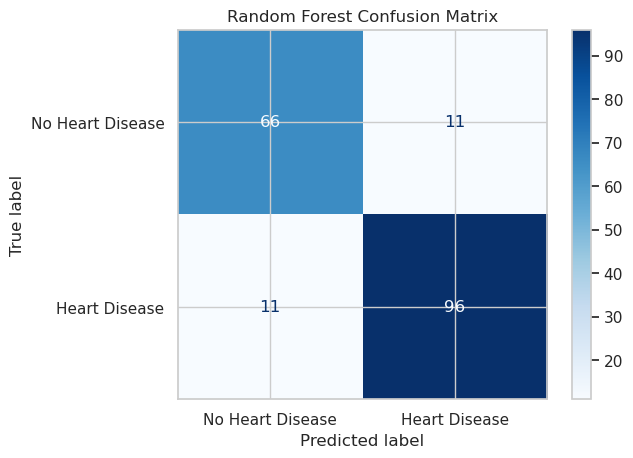

In [94]:
# Predictions from the Random Forest model
rf_best_pipeline = rf_grid_search.best_estimator_
rf_y_pred = rf_best_pipeline.predict(X_test)

# Confusion matrix for Random Forest
rf_cm = confusion_matrix(Y_test, rf_y_pred)
rf_disp = ConfusionMatrixDisplay(confusion_matrix=rf_cm, display_labels=['No Heart Disease', 'Heart Disease'])
print(f"Random Forest Confusion Matrix:\n{rf_cm}")
rf_disp.plot(cmap='Blues')
plt.title("Random Forest Confusion Matrix")
plt.show()

XGBoost Confusion Matrix:
[[68  9]
 [13 94]]


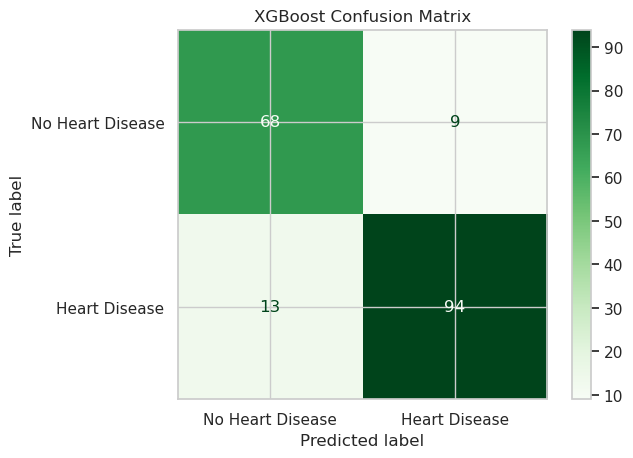

In [95]:
# Predictions from the XGBoost model
xgb_best_pipeline = grid_search.best_estimator_
xgb_y_pred = xgb_best_pipeline.predict(X_test)

# Confusion matrix for XGBoost
xgb_cm = confusion_matrix(Y_test, xgb_y_pred)
xgb_disp = ConfusionMatrixDisplay(confusion_matrix=xgb_cm, display_labels=['No Heart Disease', 'Heart Disease'])
print(f"XGBoost Confusion Matrix:\n{xgb_cm}")
xgb_disp.plot(cmap='Greens')
plt.title("XGBoost Confusion Matrix")
plt.show()

In [96]:
# Determine false positives for each model
rf_false_negatives = rf_cm[1][0]
xgb_false_negatives = xgb_cm[1][0]
# False Negatives: Actual=1, Predicted=0
print(f"Random Forest False Negatives: {rf_false_negatives}")
print(f"XGBoost False Negatives: {xgb_false_negatives}")

Random Forest False Negatives: 11
XGBoost False Negatives: 13


A model with fewer false negatives (FN) is better for heart failure prediction because missing a diagnosis (FN) means failing to identify patients who need urgent treatment. <br> False negatives can lead to serious health risks, such as worsening conditions or even death, due to lack of timely intervention.

So while both the Random Forest and XGBoost Models boast an equal accuracy of `88.04%`, the Random Forest Model is better since it minimises false negatives.